In [16]:
# === Imports Notebook ===
import sys
from pathlib import Path
ROOT = Path.cwd().parents[1]
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import seaborn as sns

from src.models import train_all_models
from src.data_loader import load_data

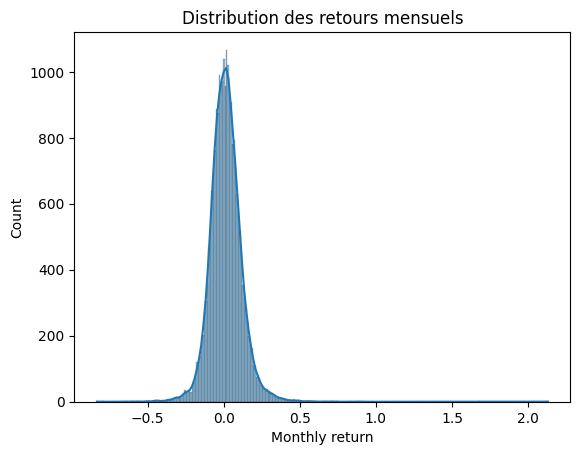

In [17]:
df = pd.read_csv("../../data/processed/final_dataset.csv", parse_dates=["date"])


sns.histplot(df["return"], kde=True)
plt.title("Distribution des retours mensuels")
plt.xlabel("Monthly return")
plt.show()


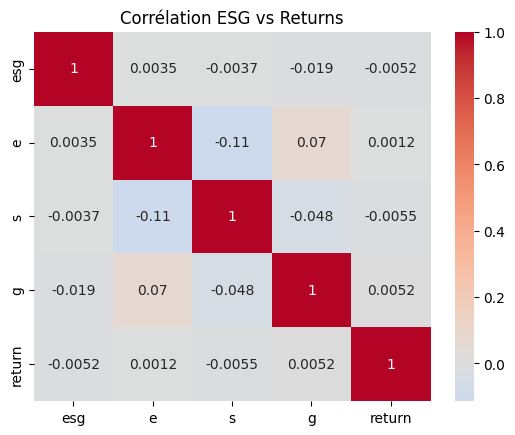

In [18]:
corr = df[["esg","e","s","g","return"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Corrélation ESG vs Returns")
plt.show()


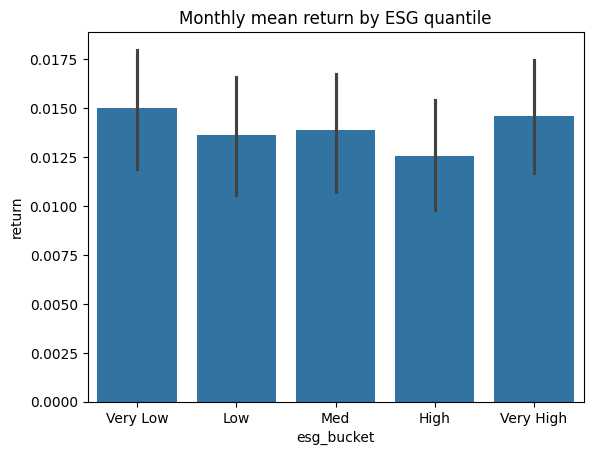

In [19]:
df["esg_bucket"] = pd.qcut(df["esg"], 5, labels=["Very Low","Low","Med","High","Very High"])

sns.barplot(data=df, x="esg_bucket", y="return")
plt.title("Monthly mean return by ESG quantile")
plt.show()


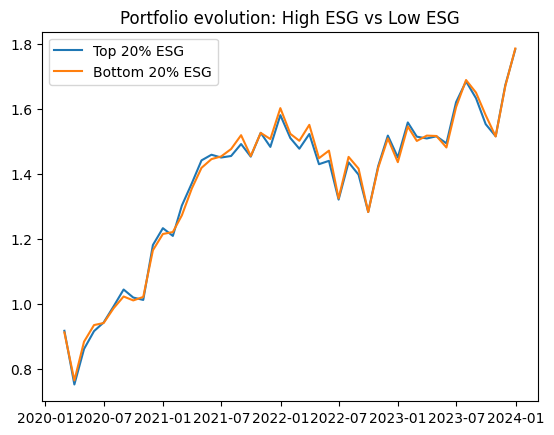

In [23]:
import numpy as np

df["esg_rank"] = df.groupby("date")["esg"].rank(pct=True)

high = df[df.esg_rank > 0.8].groupby("date")["return"].mean()
low  = df[df.esg_rank < 0.2].groupby("date")["return"].mean()

cum_high = (1+high).cumprod()
cum_low  = (1+low).cumprod()

plt.plot(cum_high, label="Top 20% ESG")
plt.plot(cum_low, label="Bottom 20% ESG")
plt.legend()
plt.title("Portfolio evolution: High ESG vs Low ESG")
plt.show()
